---

<img src="../images/anchormen-logo.png" width="500">

---


# Exercise: working with shapefiles


Tip: For parts of this exercise it may be useful to have a look at the geopandas, pandas or matplotlib documentation

- geopandas: http://geopandas.org
- pandas: https://pandas.pydata.org
- matplotlib: https://matplotlib.org/

## Libraries & settings

- Don't forget the `%matplotlib inline` setting

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

## Obtaining your shapefile

- Manually download a detailed shapefile from **Urban Atlas**: https://www.eea.europa.eu/data-and-maps/data/urban-atlas/
- Choose a city of your liking
- Unzip it in a location from where you can easily load it

## Load the shapefile

- Can you recognize the contents of the unzipped directory?
- Which file is most important for loading the data into geopandas?

In [2]:
filename = '../geodata/nl003l_rotterdam/nl003l_rotterdam.shp'

gdf = gpd.read_file(filename)

## Explore the data

- What is the meaning of one entry?
- What geometries does it contain?
- Which types of items have most entries in this dataset?

In [3]:
gdf.head()

,CITIES,LUZ_OR_CIT,CODE,ITEM,PROD_DATE,SHAPE_LEN,SHAPE_AREA,geometry
0,Rotterdam,NL003L,11100,Continuous Urban Fabric (S.L. > 80%),2009,275.858927,3615.634798,"POLYGON ((3925932.640475606 3205141.38033925, ..."
1,Rotterdam,NL003L,11100,Continuous Urban Fabric (S.L. > 80%),2009,298.726224,4039.476391,"POLYGON ((3925817.700008598 3205146.972752841,..."
2,Rotterdam,NL003L,11100,Continuous Urban Fabric (S.L. > 80%),2009,350.058745,7068.792032,"POLYGON ((3925762.795023791 3205351.998965024,..."
3,Rotterdam,NL003L,11100,Continuous Urban Fabric (S.L. > 80%),2009,546.580692,7898.871176,"POLYGON ((3926012.384703012 3205343.751925158,..."
4,Rotterdam,NL003L,11100,Continuous Urban Fabric (S.L. > 80%),2009,445.539953,5787.414127,"POLYGON ((3925598.443069084 3205466.058678379,..."


In [4]:
gdf.ITEM.value_counts()

Continuous Urban Fabric (S.L. > 80%)                            5367
Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)            3893
Industrial, commercial, public, military and private units      2580
Green urban areas                                               1179
Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)    1011
Agricultural + Semi-natural areas + Wetlands                     821
Water bodies                                                     512
Isolated Structures                                              438
Sports and leisure facilities                                    430
Land without current use                                         377
Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)        354
Port areas                                                       279
Forests                                                          200
Construction sites                                               190
Other roads and associated land   

## Preprocessing

- Create a smaller dataset that only the types of items that you are interested in (such as airports, railways, main roads, water bodies, green urban areas, etc.)
- How many entries does your new dataset contain?

In [5]:
selected_types = ['Water bodies', 'Port areas', 'Airports', 'Green urban areas', 'Fast transit roads and associated land']
gdf_subset = gdf[gdf.ITEM.isin(selected_types)]

In [6]:
gdf_subset.shape

(2013, 8)

## Create a spatial plot

- In your spatial plot, color the areas by item type
- Modify the plot to your own wishes (adding legend, title, etc.)

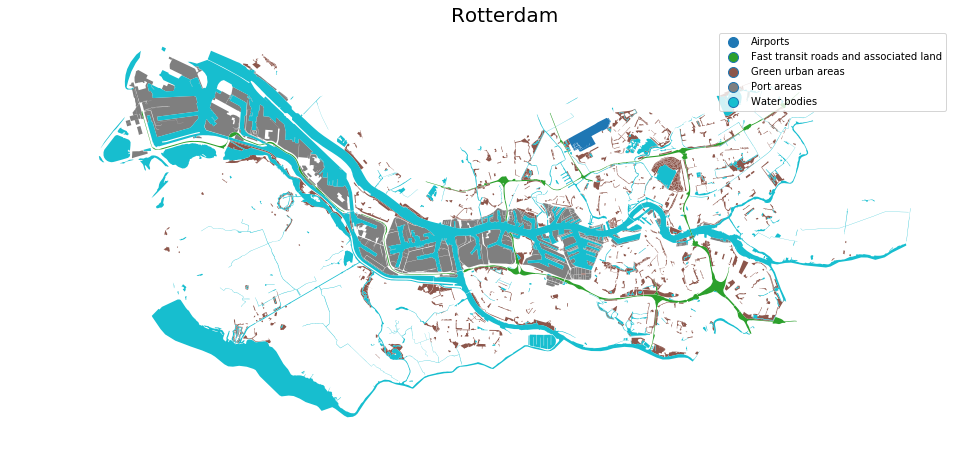

In [7]:
fig, ax = plt.subplots(figsize=(16,16), subplot_kw={'aspect':'equal'})
ax.set_axis_off()
ax.set_title('Rotterdam', size = 20)
gdf_subset.plot(column='ITEM', legend=True, ax=ax)

## Export your plot to an image file

- Use a matplotlib command to export your image to a png file

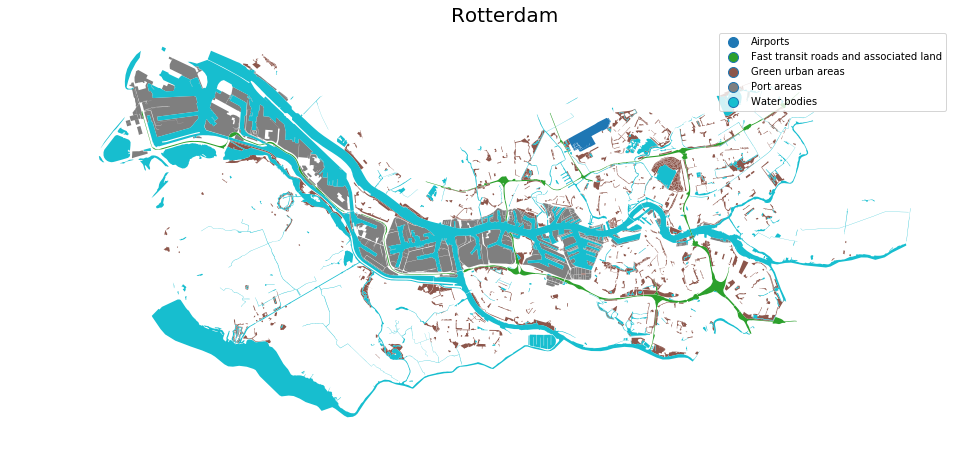

In [8]:
fig, ax = plt.subplots(figsize=(16,16), subplot_kw={'aspect':'equal'})
ax.set_axis_off()
ax.set_title('Rotterdam', size = 20)
gdf_subset.plot(column='ITEM', legend=True, ax=ax)
plt.savefig('../geodata/output/rotterdam.png')

## Save the selected data to an output shapefile

- What geopandas method do you need to use to write shapefiles?
- Write the geodataframe to an output shapefile with an easily recognizable name
- Inspect the output files that are written to your filesystem

In [9]:
gdf_subset.to_file("../geodata/output/rotterdam.shp")

## Optional: Zoom in on part of the map

- You could use `plt.xlim` and `plt.ylim` for this, as available in `matplotlib` (or alternatively, slice the geodataframe before you plot it)

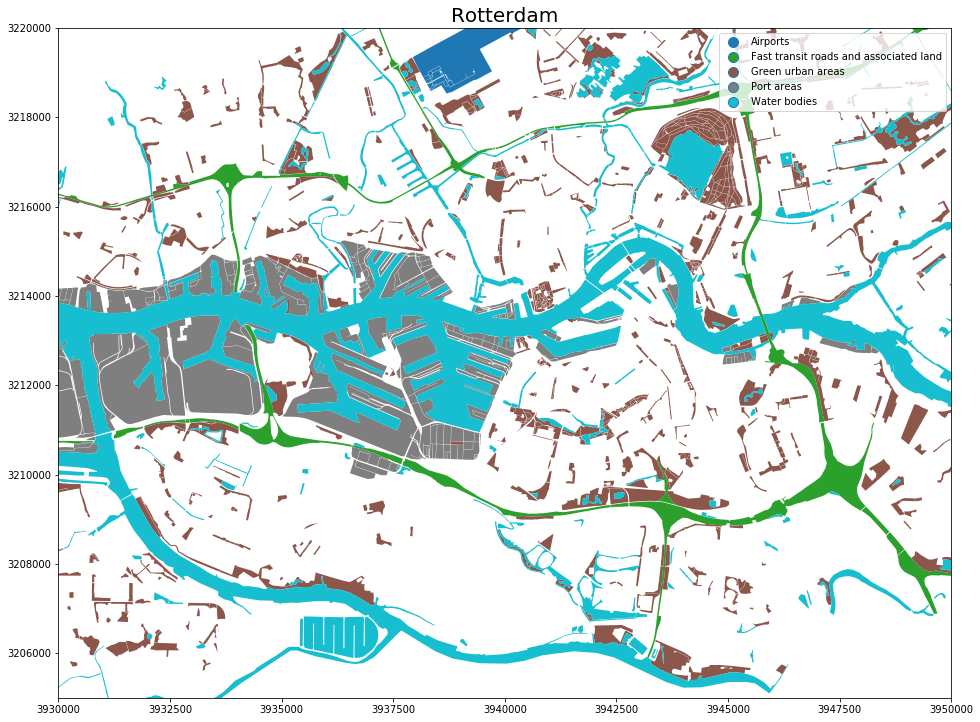

In [10]:
fig, ax = plt.subplots(figsize=(16,16), subplot_kw={'aspect':'equal'})
plt.xlim(3930000, 3950000)
plt.ylim(3205000, 3220000)
ax.set_title('Rotterdam', size = 20)
gdf_subset.plot(column='ITEM', legend=True, ax=ax)

## Optional: Plot buffers around items

- Can you figure out how to plot a buffer zone around all waterways?

*Hint: Use the `.buffer()` method on a GeoSeries that contains all waterways (or rather, its `.unary_union`)*

In [11]:
# Take unary_union of airports and add buffer
airports = gdf_subset[gdf_subset['ITEM'] == 'Airports'].geometry.unary_union
airports_buffer = gpd.GeoSeries(airports.buffer(1000))

# Idem for waterbodies
waterbodies = gdf_subset[gdf_subset['ITEM'] == 'Water bodies'].geometry.unary_union
waterbodies_buffer = gpd.GeoSeries(waterbodies.buffer(200))

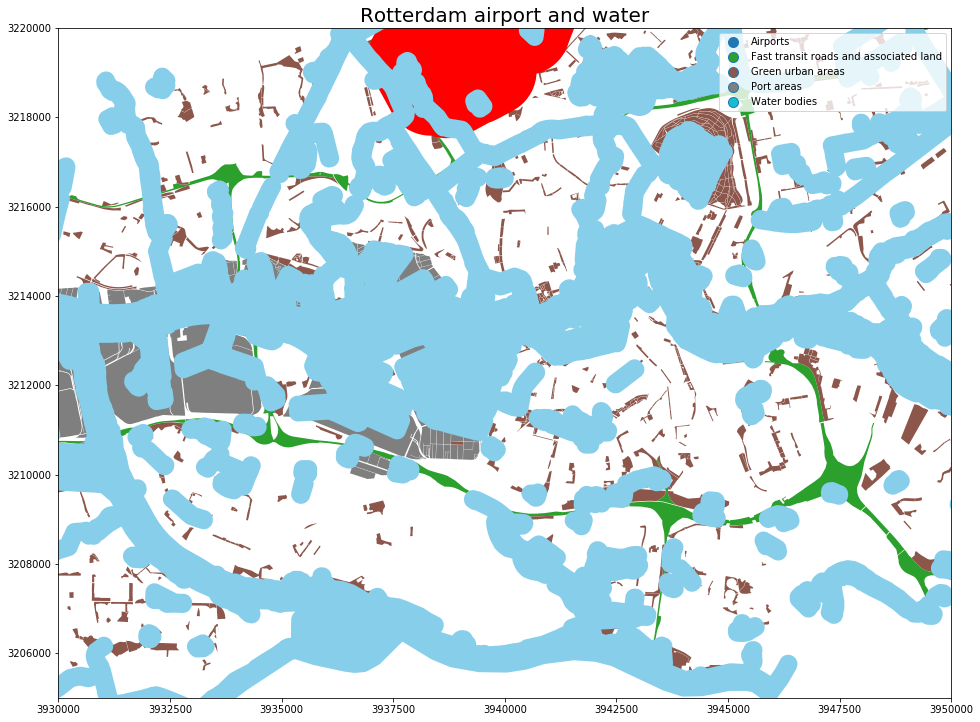

In [12]:
# Plot including buffer zones
fig, ax = plt.subplots(figsize=(16,16), subplot_kw={'aspect':'equal'})
plt.xlim(3930000, 3950000)
plt.ylim(3205000, 3220000)
ax.set_title('Rotterdam airport and water', size = 20)
gdf_subset.plot(column='ITEM', legend=True, ax=ax)
airports_buffer.plot(ax=ax, color='red')
waterbodies_buffer.plot(ax=ax, color='skyblue')

## If you have time left: check with your fellow students how they did the exercise

Nice work! Now have a look at what your fellow students did.